In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [35]:
data = pd.read_csv('S:/datasets/insurance.csv')

In [36]:
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Preprocessing

In [38]:
pd.get_dummies(X['region'], prefix='region')

NameError: name 'X' is not defined

In [53]:
def preprocess_inputs(df):
    df = df.copy()
    
    #downcasting
    pd.set_option('future.no_silent_downcasting', True)
    
    #Binary encoding
    df['sex']=df['sex'].replace({'female':0, 'male':1})
    df['smoker']=df['smoker'].replace({'no':0, 'yes':1})
    
    #One-hot encoding
    region_dummies = pd.get_dummies(df['region'], prefix='region').astype(int)
    df = pd.concat([df, region_dummies], axis=1)
    df = df.drop('region', axis=1)
    
    #Split into x,y
    Y = df['expenses']
    X = df.drop('expenses', axis=1)
    
    
    #train test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, shuffle = True, random_state=1)
    
    #Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)


    
    # Save the scaler
    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    
    
    return X_train, X_test, Y_train, Y_test

In [54]:
X_train, X_test, Y_train, Y_test = preprocess_inputs(data)

In [55]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.797152,0.976766,-0.704206,-0.904002,-0.509664,-0.562544,1.788102,-0.600387,-0.587220
1,-1.271085,-1.023787,-0.704206,-0.085679,-0.509664,-0.562544,-0.559252,-0.600387,1.702939
2,-0.985811,0.976766,-0.737076,-0.904002,-0.509664,1.777639,-0.559252,-0.600387,-0.587220
3,0.797152,-1.023787,-0.408379,1.550967,-0.509664,-0.562544,-0.559252,1.665591,-0.587220
4,0.868471,0.976766,1.481632,-0.085679,-0.509664,-0.562544,-0.559252,-0.600387,1.702939
...,...,...,...,...,...,...,...,...,...
931,1.510338,0.976766,-0.293334,-0.904002,-0.509664,-0.562544,-0.559252,-0.600387,1.702939
932,-0.914493,-1.023787,-0.211160,0.732644,-0.509664,1.777639,-0.559252,-0.600387,-0.587220
933,0.868471,-1.023787,0.709193,0.732644,1.962076,1.777639,-0.559252,-0.600387,-0.587220
934,0.083967,-1.023787,-1.394471,0.732644,1.962076,-0.562544,-0.559252,1.665591,-0.587220


In [47]:
X_train.describe()

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,38.822650,30.684829,1.104701,0.240385,0.238248,0.264957,0.256410
std,14.029097,6.087874,1.222664,0.427545,0.426239,0.441546,0.436884
min,18.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.275000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,30.500000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.725000,2.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,53.100000,5.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
Y_train

744      8827.21
363      2597.78
10       2721.32
970     10702.64
634      9391.35
          ...   
715     12146.97
905      4564.19
1096    44641.20
235     19444.27
1061    11554.22
Name: expenses, Length: 936, dtype: float64

# Training

In [49]:
# "Neural Network": MLPRegressor(early_stopping=True, tol=1e-3, learning_rate_init=0.001, max_iter=1000),
    # "SVM (Linear Kernel)": LinearSVR(),
    # "SVM (RBF Kernel)": SVR(),

models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    print(name + " trained.")

# Save the dictionary of models to a single pickle file
with open('models.pkl', 'wb') as file:
    pickle.dump(models, file)

Linear Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Random Forest trained.
Gradient Boosting trained.


Linear Regression prediction done.
K-Nearest Neighbors prediction done.
Decision Tree prediction done.
Random Forest prediction done.
Gradient Boosting prediction done.


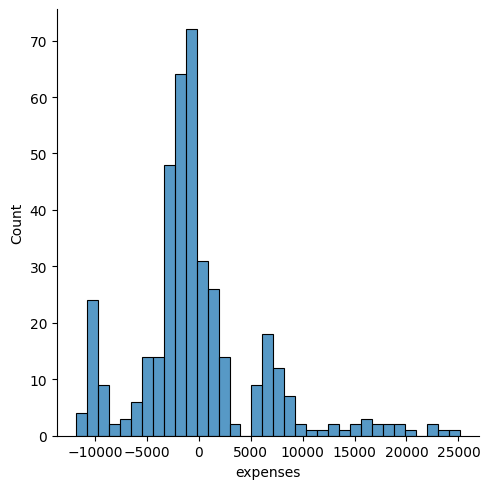

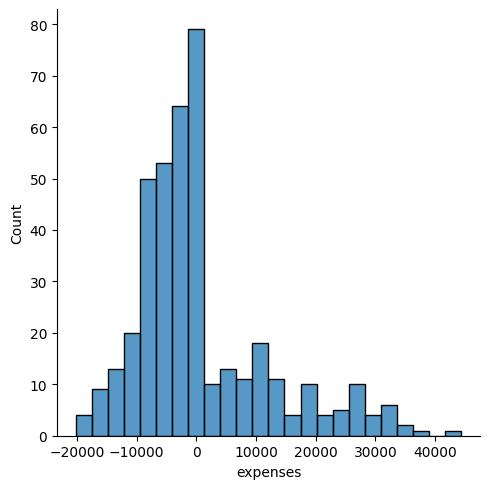

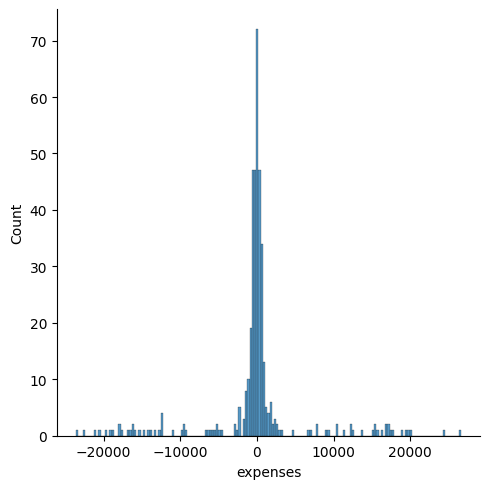

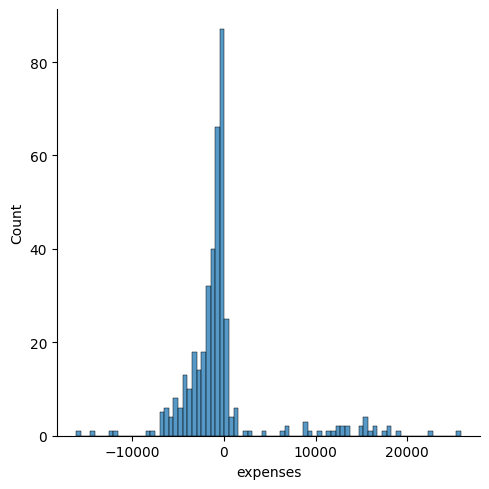

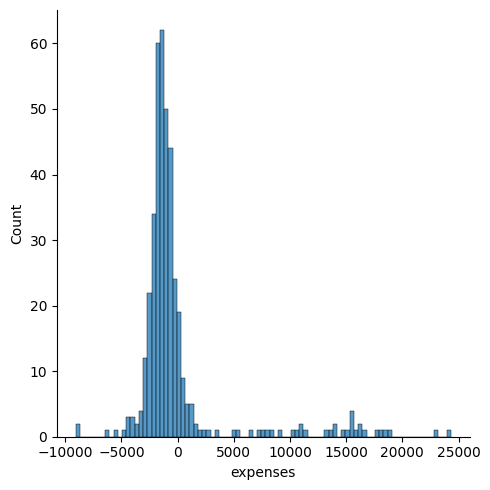

In [50]:
    # Load the dictionary of models
    with open('models.pkl', 'rb') as file:
        models = pickle.load(file)
    
        
    predictions = {}
    
    for name, model in models.items():
        prediction = model.predict(X_test)
        predictions[name] = prediction
        print(f"{name} prediction done.")
        sns.displot(Y_test-prediction)

# Results

In [51]:
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test,Y_test)))

Linear Regression R^2 Score: 0.74060
K-Nearest Neighbors R^2 Score: 0.10806
Decision Tree R^2 Score: 0.73074
Random Forest R^2 Score: 0.83516
Gradient Boosting R^2 Score: 0.86117
